# Proyek Klasifikasi Gambar : mengenali koral laut sehat atau tidak

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


pertamama saya mengunduh data

In [ ]:
!pip install split-folders

In [ ]:
import zipfile, os
import random
import shutil
import splitfolders as spf

In [ ]:
filedir = '/content/drive/MyDrive/Colab Notebooks/Coral/archive.zip'
zip = zipfile.ZipFile(filedir, 'r')
zip.extractall('/content/drive/MyDrive/Colab Notebooks/Coral/coral')
zip.close()

In [ ]:
spf.ratio('/content/drive/MyDrive/Colab Notebooks/Coral/coral', output='/content/drive/MyDrive/Colab Notebooks/Coral/coral/split', ratio=(0.7,0.3), seed=1337)

Copying files: 923 files [00:19, 48.44 files/s]


In [ ]:
traindir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Coral/coral/split','train')
valdir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Coral/coral/split','val')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, vertical_flip=True, shear_range=0.2, fill_mode='nearest', validation_split=0.4)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
traingenerator = train_datagen.flow_from_directory(traindir, shuffle=True, target_size=(100,150), batch_size=25, class_mode='categorical')

Found 645 images belonging to 2 classes.


In [ ]:
valgenerator = val_datagen.flow_from_directory(valdir, shuffle=True, target_size=(100,150), batch_size=25, class_mode='categorical')

Found 278 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(2 ,activation = 'sigmoid'),
                             ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 17, 64)        0

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(traingenerator, steps_per_epoch=25, epochs=20, validation_data=valgenerator, validation_steps=5, verbose=2, )

Epoch 1/20
25/25 - 19s - loss: 0.7180 - accuracy: 0.5565 - val_loss: 0.6848 - val_accuracy: 0.6240 - 19s/epoch - 764ms/step
Epoch 2/20
25/25 - 15s - loss: 0.6662 - accuracy: 0.6323 - val_loss: 0.6227 - val_accuracy: 0.6480 - 15s/epoch - 616ms/step
Epoch 3/20
25/25 - 15s - loss: 0.6156 - accuracy: 0.6726 - val_loss: 0.6879 - val_accuracy: 0.5440 - 15s/epoch - 610ms/step
Epoch 4/20
25/25 - 15s - loss: 0.6278 - accuracy: 0.6452 - val_loss: 0.6025 - val_accuracy: 0.7040 - 15s/epoch - 609ms/step
Epoch 5/20
25/25 - 16s - loss: 0.6139 - accuracy: 0.7065 - val_loss: 0.6001 - val_accuracy: 0.6320 - 16s/epoch - 646ms/step
Epoch 6/20
25/25 - 15s - loss: 0.5704 - accuracy: 0.6816 - val_loss: 0.5455 - val_accuracy: 0.7040 - 15s/epoch - 604ms/step
Epoch 7/20
25/25 - 15s - loss: 0.5597 - accuracy: 0.7113 - val_loss: 0.5032 - val_accuracy: 0.7280 - 15s/epoch - 597ms/step
Epoch 8/20
25/25 - 18s - loss: 0.5441 - accuracy: 0.7129 - val_loss: 0.5923 - val_accuracy: 0.6800 - 18s/epoch - 738ms/step
Epoch 9/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from tensorflow.keras.preprocessing import image
%matplotlib inline

Saving 189518468_76ff603ccc_b.jpg to 189518468_76ff603ccc_b.jpg
1/1 [==============================] - 0s 171ms/step
[[1. 0.]]
<PIL.Image.Image image mode=RGB size=150x100 at 0x7D4B6589D180>


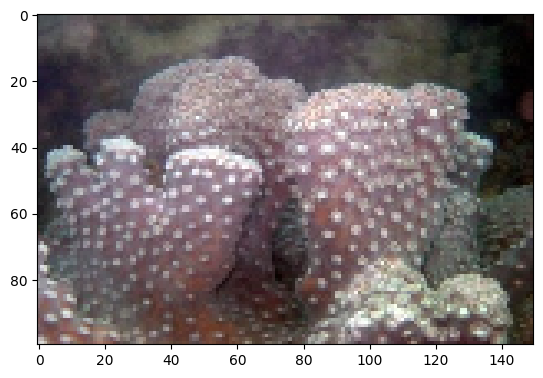

In [ ]:
upload_file = files.upload()

for  fl in upload_file.keys():
  imgplt = image.load_img(fl, target_size=(100,150))
  plot = plt.imshow(imgplt)
  x = image.img_to_array(imgplt)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

  clasification = model.predict(img, batch_size=10)
  print(clasification)
  print(imgplt)